### Example: source link
https://medium.com/machine-learning-with-python/linear-regression-implementation-in-python-2de514d3a34e

Predicting sales based on the money spent on TV for marketing. In this case, there is only one independent variable, i.e., money spent on TV for marketing, and one dependent variable, i.e., sales, that is the value to be predicted.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('advertising.csv')

In [6]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
#Dropping the unnecessary columns

dataset.drop(columns=['Radio','Newspaper'], inplace=True)

In [8]:
dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [9]:
#Setting the value for X and Y

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,1]


# x = dataset[['TV']]
# y = dataset['Sales']

In [10]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [11]:
# Implementing the linear model

from sklearn.linear_model import LinearRegression

Regressor = LinearRegression()

Regressor.fit(X_train, y_train)


LinearRegression()

In [12]:
# Model Equation

#Regression Equation: Sales = 6.948 + 0.054 * TV


print(f"Intercept: {Regressor.intercept_} \n")

print(f"Coefficient: {Regressor.coef_}")

Intercept: 6.948683200001357 

Coefficient: [0.05454575]


In [15]:
dataset.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,15.6


In [32]:
# List of input samples (each sample is a list of features)
input_data_list = [[230.1],[44.5],[17.2],[151.5]]

# Loop through each sample, reshape as 2D, and predict
for sample in input_data_list:
    prediction = Regressor.predict([sample])  # <- This makes it 2D
    print(f"Input: {sample} -> Predicted value: {prediction[0]:.2f}")


Input: [230.1] -> Predicted value: 19.50
Input: [44.5] -> Predicted value: 9.38
Input: [17.2] -> Predicted value: 7.89
Input: [151.5] -> Predicted value: 15.21


C:\Users\Tayyab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Tayyab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Tayyab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Tayyab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


From the above-obtained equation for the Simple Linear Regression Model,
we can see that the value of intercept is 6.948, which shows that if we keep the money spent on TV for advertisement as 0, 
the estimated average sales will be 6.948 and a single rupee increase in the money spent on TV for advertisement increases sales by 0.054.



In [61]:
# Prediction on the test set

y_pred = Regressor.predict(X_test)
y_pred

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

Once we have fitted (trained) the model, we can make predictions using the predict() function.
We pass the values of x_test to this method and compare the predicted values called y_pred_slr with y_test values to check 
how accurate our predicted values are.



In [62]:
# Actual values and the predicted values

diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff.head()

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392


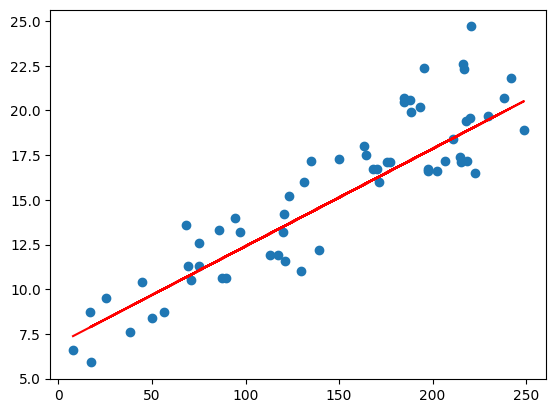

In [64]:
##Line of best fit

plt.scatter(X_test,y_test)

plt.plot(X_test, y_pred, 'Red')
plt.show()


In [66]:
# Evaluating the Model
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)

meanSqErr = metrics.mean_squared_error(y_test, y_pred)

rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(Regressor.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 81.10
Mean Absolute Error: 1.6480589869746525
Mean Square Error: 4.077556371826948
Root Mean Square Error: 2.019296008966231


R Squared: R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 81.10, which indicates that 81.10% of the data fit the regression model.

Mean Absolute Error: Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 1.648, which is pretty good as it is close to 0.

Mean Square Error: Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 4.077, which is pretty good.

Root Mean Square Error: Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 2.019, which is pretty good.

Conclusion

The Simple Linear Regression model performs well as 81.10% of the data fit the regression model. Also, the mean absolute error, mean square error, and the root mean square error are less.